# Machine learning modules

## Numpy

Manipulating `numpy` arrays is an important part of doing machine learning (or, really, any type of scientific computation) in python. Numpy arrays are similar to Python lists but have much more functionality and are used mathematically as matrices.

In [1]:
import numpy as np

# Generating a random array
X = np.random.rand(3, 5)
print(X)

[[0.94441879 0.63264204 0.13425584 0.51547856 0.00359769]
 [0.517311   0.17523842 0.78758332 0.65553125 0.48132899]
 [0.08853845 0.45397192 0.80879777 0.55936204 0.19912426]]


In [2]:
# Accessing elements

# get a single element 
# (here: an element in the first row and column)
print(X[0, 0])

# get a row 
# (here: 2nd row)
print(X[1])

# get a column
# (here: 2nd column)
print(X[:, 1])

0.9444187895020715
[0.517311   0.17523842 0.78758332 0.65553125 0.48132899]
[0.63264204 0.17523842 0.45397192]


In [3]:
# Transposing an array
print(X.T)

[[0.94441879 0.517311   0.08853845]
 [0.63264204 0.17523842 0.45397192]
 [0.13425584 0.78758332 0.80879777]
 [0.51547856 0.65553125 0.55936204]
 [0.00359769 0.48132899 0.19912426]]


$$\begin{bmatrix}
    1 & 2 & 3 & 4 \\
    5 & 6 & 7 & 8
\end{bmatrix}^T
= 
\begin{bmatrix}
    1 & 5 \\
    2 & 6 \\
    3 & 7 \\
    4 & 8
\end{bmatrix}
$$



In [4]:
# Creating a row vector
# of evenly spaced numbers over a specified interval.
y = np.linspace(0, 12, 5)
print(y)

[ 0.  3.  6.  9. 12.]


In [5]:
# Turning the row vector into a column vector
print(y[:, np.newaxis])

[[ 0.]
 [ 3.]
 [ 6.]
 [ 9.]
 [12.]]


In [6]:
# Reshaping an array
print(X.reshape(5, 3))

[[0.94441879 0.63264204 0.13425584]
 [0.51547856 0.00359769 0.517311  ]
 [0.17523842 0.78758332 0.65553125]
 [0.48132899 0.08853845 0.45397192]
 [0.80879777 0.55936204 0.19912426]]


In [7]:
# Indexing by an array of integers (fancy indexing)
indices = np.array([3, 1, 0])
print(indices)
X[:, indices]

[3 1 0]


array([[0.51547856, 0.63264204, 0.94441879],
       [0.65553125, 0.17523842, 0.517311  ],
       [0.55936204, 0.45397192, 0.08853845]])

## matplotlib

Another important part of machine learning is the visualization of data.  The most common
tool for this in Python is [`matplotlib`](http://matplotlib.org).  It is an extremely flexible package, and
we will go over some basics here.

Since we are using Jupyter notebooks, let us use one of IPython's convenient built-in "[magic functions](https://ipython.org/ipython-doc/3/interactive/magics.html)", the "matoplotlib inline" mode, which will draw the plots directly inside the notebook.

In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

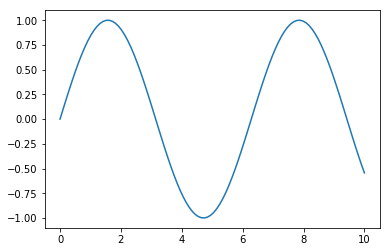

In [10]:
# Plotting a line
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x));

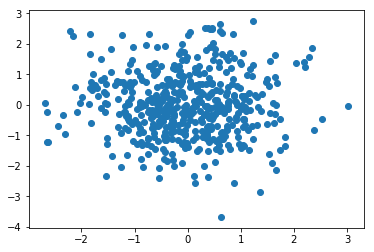

In [11]:
# Scatter-plot points
x = np.random.normal(size=500)
y = np.random.normal(size=500)
plt.scatter(x, y);

(100, 100)


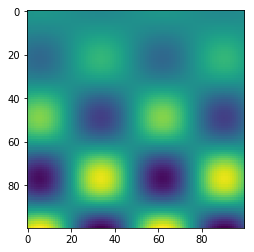

In [12]:
# Showing images using imshow
# - note that origin is at the top-left by default!

x = np.linspace(1, 12, 100)
y = x[:, np.newaxis]

im = y * np.sin(x) * np.cos(y)
print(im.shape)

plt.imshow(im);

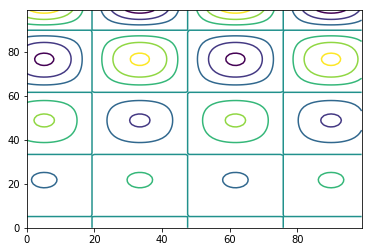

In [13]:
# Contour plots 
# - note that origin here is at the bottom-left by default!
plt.contour(im);

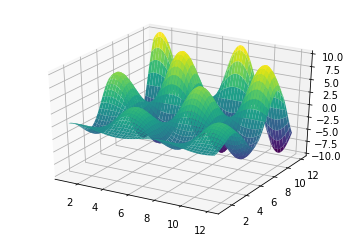

In [14]:
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
xgrid, ygrid = np.meshgrid(x, y.ravel())
ax.plot_surface(xgrid, ygrid, im, cmap=plt.cm.viridis, cstride=2, rstride=2, linewidth=0);